In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline

excel_file_path = "../EDA/Titanic_EDA/train.csv"
df = pd.read_csv(
    excel_file_path, encoding="latin-1", usecols=["Age", "Fare", "Survived"]
)
# filling nil values
mean = df["Age"].mean()
print(mean)
df["Age"].fillna(mean, inplace=True)
df.head()

29.69911764705882


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
# preparing training and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(["Survived"], axis=1),
    df["Survived"],
    test_size=0.2,
)

print(x_train.columns, x_test.columns)
x_train.skew()

Index(['Age', 'Fare'], dtype='object') Index(['Age', 'Fare'], dtype='object')


Age     0.304819
Fare    5.055687
dtype: float64

LogisticRegression
Before trans Accuracy 0.6372549019607843
After trans Accuracy 0.6650326797385622

DecisionTreeClassifier
Before trans Accuracy 0.5859477124183007
After trans Accuracy 0.6026143790849673

after standardization

LogisticRegression
Before trans Accuracy 0.6372549019607843
After trans Accuracy 0.6650326797385622

DecisionTreeClassifier
Before trans Accuracy 0.580392156862745
After trans Accuracy 0.6081699346405228


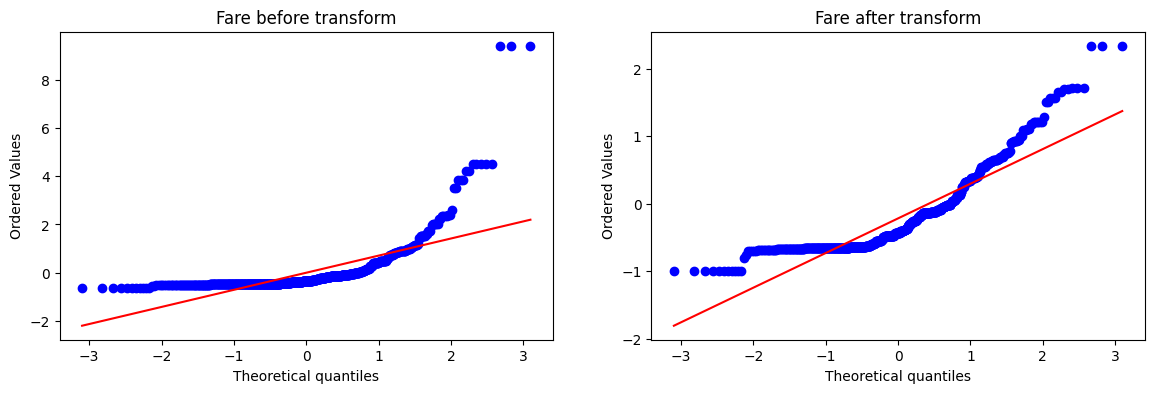

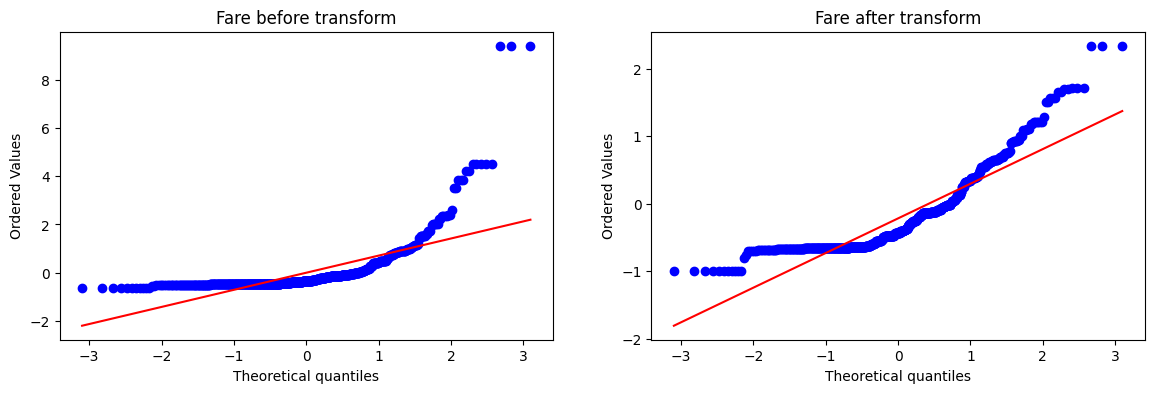

In [9]:
from scipy import stats


def apply_transform(transform, x_train, x_test, y_train, y_test, feature):
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    stats.probplot(x_train[feature], dist="norm", plot=plt)
    plt.title(f"{feature} before transform")

    trf = ColumnTransformer(
        [("log", FunctionTransformer(transform), [feature])], remainder="passthrough"
    )
    x_train_trans = trf.fit_transform(x_train)
    x_test_trans = trf.transform(x_test)

    plt.subplot(122)
    stats.probplot(x_train_trans[:, 0], dist="norm", plot=plt)
    plt.title(f"{feature} after transform")

    clf = LogisticRegression()
    print("LogisticRegression")
    print(
        "Before trans Accuracy",
        np.mean(cross_val_score(clf, x_test, y_test, scoring="accuracy", cv=10)),
    )
    print(
        "After trans Accuracy",
        np.mean(cross_val_score(clf, x_test_trans, y_test, scoring="accuracy", cv=10)),
    )

    clf = DecisionTreeClassifier()
    print("\nDecisionTreeClassifier")
    print(
        "Before trans Accuracy",
        np.mean(cross_val_score(clf, x_test, y_test, scoring="accuracy", cv=10)),
    )
    print(
        "After trans Accuracy",
        np.mean(cross_val_score(clf, x_test_trans, y_test, scoring="accuracy", cv=10)),
    )


apply_transform(np.log1p, x_train, x_test, y_train, y_test, "Fare")

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

print("\nafter standardization\n")
apply_transform(np.log1p, x_train, x_test, y_train, y_test, "Fare")